<a href="https://colab.research.google.com/github/SamudralaAnuhya/Heart-failure-prediction/blob/main/Heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#For the heart failure prediction dataset we will be working with 3 classifier algorithms

1. Decision Tree
2. Random Forest
3. XG boost

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

RANDOM_STATE = 55


#### Datatset
- This dataset is obtained from Kaggle: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

#### Context
- Cardiovascular disease (CVDs) is the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs.
- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management.  
- This dataset contains 11 features that can be used to predict possible heart disease.
- Let's train a machine learning model to assist with diagnosing this disease.

#### Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]



categorical values :
- Sex
- ChestPainType
- RestingECG
- ExerciseAngina
- ST_Slope

we need to do one-hot encode for them

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Heart_Failure_Prediction/heart.csv")

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#hot encoding using pandas(for categorical values instead of names it will change to 0/1)
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope']

In [ ]:
df = pd.get_dummies(data = df,
                         prefix = cat_variables,
                         columns = cat_variables)

In [ ]:
df.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [ ]:
#remove target column(heart disease) from the dataset fro better training
features = [x for x in df.columns if x != 'HeartDisease']
len(features)

20

In [ ]:
#split the dataset
#we need to split data into 4categories (x_train , y_train )...from features
                            #and validation_test(x_val , y_val) from heartdisease

X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size = 0.8, random_state = RANDOM_STATE)

In [ ]:
len(df) ,len(X_train) , len(X_val)

(918, 734, 184)

#Building the models

#Decision Tree

**Decision Tree**


There are several hyperparameters in the Decision Tree object from Scikit-learn. We will use only some of them here

The hyperparameters we will use and investigate here are:

min_samples_split: The minimum number of samples required to split an internal node.
Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
max_depth: The maximum depth of the tree.
Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [ ]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples , if float its an avg
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # none means no depth limit

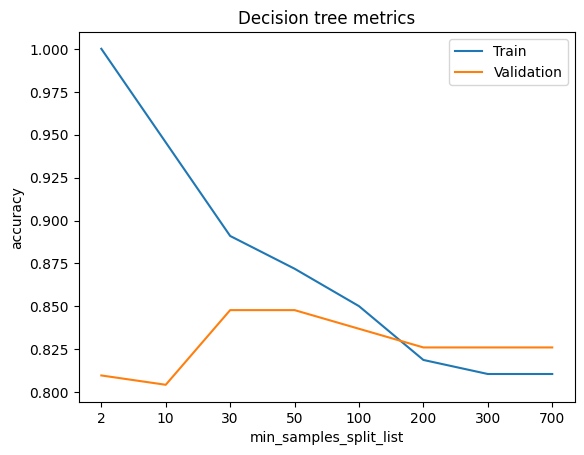

In [ ]:
accuracy_list_train = []
accuracy_list_validation = []

for samples_split in min_samples_split_list :
  model = DecisionTreeClassifier(min_samples_split= samples_split , random_state= RANDOM_STATE).fit(X_train , y_train)

  prediction_train = model.predict(X_train) #training data
  prediction_validation = model.predict(X_val) #testing data

  accuracy_train = accuracy_score(prediction_train , y_train)
  accuracy_list_train.append(accuracy_train)

  accuracy_test = accuracy_score(prediction_validation , y_val)
  accuracy_list_validation.append(accuracy_test)

plt.title ('Decision tree metrics')
plt.ylabel('accuracy')
plt.xlabel('min_samples_split_list')
plt.xticks(ticks = range(len(min_samples_split_list )) ,labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_validation)
plt.legend(['Train','Validation'])

we have to read based on underfit , overfit and right fit
underfit - when training data < validation data
overfit - both training and validation will start decreasing
rightfit - the data which is between both



increasing start at 10 and training accuracy is > validation so no overfit here

decreaing trend start at > 50 from thew underfit

**so the best split value is 50**

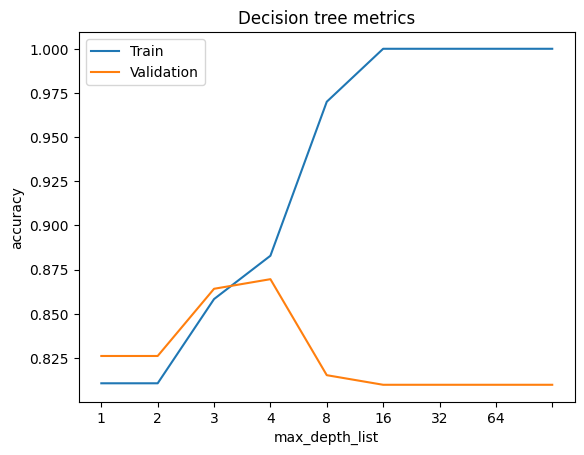

In [ ]:
#try all the above with max_depth
accuracy_list_train = []
accuracy_list_validation = []

for depth in max_depth_list :
  model = DecisionTreeClassifier(max_depth = depth , random_state= RANDOM_STATE).fit(X_train , y_train)

  prediction_train = model.predict(X_train) #training data
  prediction_validation = model.predict(X_val) #testing data

  accuracy_train = accuracy_score(prediction_train , y_train)
  accuracy_list_train.append(accuracy_train)

  accuracy_test = accuracy_score(prediction_validation , y_val)
  accuracy_list_validation.append(accuracy_test)

plt.title ('Decision tree metrics')
plt.ylabel('accuracy')
plt.xlabel('max_depth_list')
plt.xticks(ticks = range(len(max_depth_list )) ,labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_validation)
plt.legend(['Train','Validation'])

graph

train < validation ...underfit  untill (3)

validation decreasing after 4 ..from here overfit

rightfit ...4 depth

In [ ]:
#right fit for min_samples_split_list = 50 , max_depth_list = 3
Decision_tree_model = DecisionTreeClassifier(min_samples_split = 50 , max_depth= 4 , random_state=RANDOM_STATE).fit(X_train,y_train)

In [ ]:
print(f"Decision_training_accuracy_score : {accuracy_score(Decision_tree_model.predict(X_train) ,y_train) :.4f}")
print(f"Decision_Testing accuracy score : {accuracy_score(Decision_tree_model.predict(X_val) ,y_val):.4f}")


Decision_training_accuracy_score : 0.8665
Decision_Testing accuracy score : 0.8696


#Random Forest

In [ ]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]
#we have to check based on all above hyperparameters which suits best for us

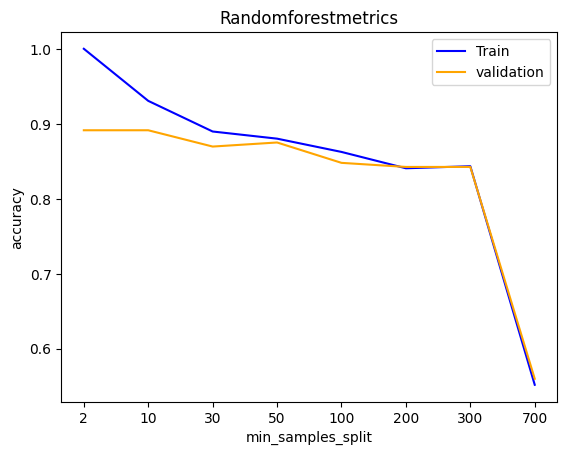

In [ ]:
accuracy_list_train = []
accuracy_list_val = []

#based on split
for sample_split in  min_samples_split_list :
  model = RandomForestClassifier(min_samples_split=sample_split , random_state= RANDOM_STATE).fit(X_train ,y_train)

  accuracy_train = accuracy_score(model.predict(X_train) , y_train)
  accuracy_list_train.append(accuracy_train)
  accuracy_test = accuracy_score(model.predict(X_val) , y_val)
  accuracy_list_val.append(accuracy_test)

  plt.close()
  plt.title('Randomforestmetrics')
  plt.xlabel('min_samples_split')
  plt.ylabel('accuracy')
  plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
  plt.plot(accuracy_list_train ,  color='blue', label='Train')
  plt.plot(accuracy_list_val ,color='orange', label='validation' )
  plt.legend()





underfit(train<validation) : no underfit

overfit (decreasing validation) : 10

rightfit_split : 10

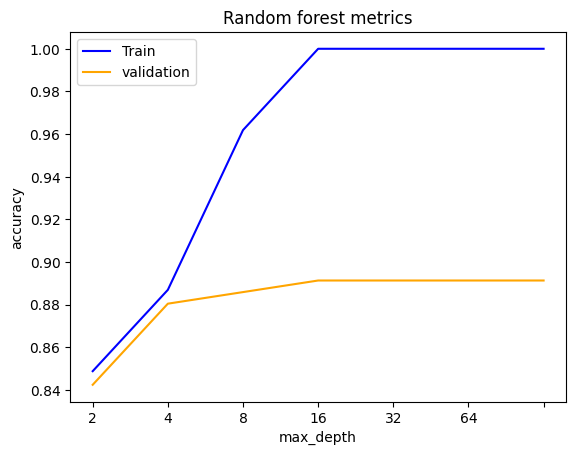

In [ ]:
#based on depth list
random_depth_accuracy_trainlist = []
random_depth_accuracy_testlist = []

for  depth in max_depth_list :

  model_depth = RandomForestClassifier(max_depth = depth , random_state = RANDOM_STATE).fit(X_train ,y_train)
  random_depth_accuracy_train = accuracy_score(model_depth.predict(X_train),y_train)
  random_depth_accuracy_test = accuracy_score(model_depth.predict(X_val),y_val)
  random_depth_accuracy_trainlist.append(random_depth_accuracy_train)
  random_depth_accuracy_testlist.append(random_depth_accuracy_test)

  plt.close()
  plt.title('Random forest metrics')
  plt.xlabel('max_depth')
  plt.ylabel('accuracy')
  plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
  plt.plot(random_depth_accuracy_trainlist , color='blue', label='Train')
  plt.plot(random_depth_accuracy_testlist , color='orange', label='validation')
  plt.legend(['Train' , 'validation'])

underfit(train<validation) : no underfit

overfit (decreasing validation) : 16

rightfit_depth : 16

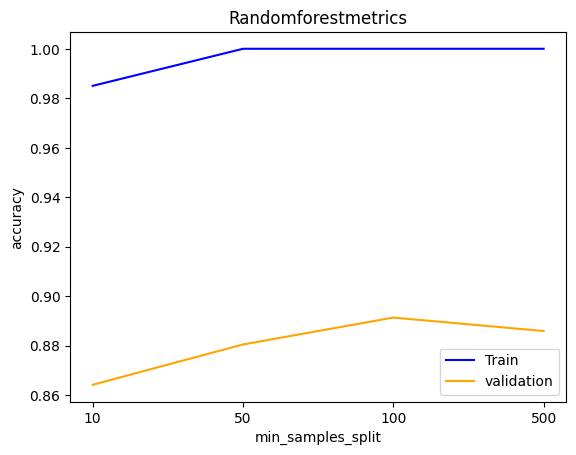

In [ ]:
accuracy_list_train = []
accuracy_list_val = []

#based on split
for estimators in  n_estimators_list :
  model = RandomForestClassifier(n_estimators=estimators , random_state= RANDOM_STATE).fit(X_train ,y_train)

  accuracy_train = accuracy_score(model.predict(X_train) , y_train)
  accuracy_list_train.append(accuracy_train)
  accuracy_test = accuracy_score(model.predict(X_val) , y_val)
  accuracy_list_val.append(accuracy_test)
  plt.close()
  plt.title('Randomforestmetrics')
  plt.xlabel('estimators')
  plt.ylabel('accuracy')
  plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
  plt.plot(accuracy_list_train , color='blue', label='Train')
  plt.plot(accuracy_list_val , color='orange', label='validation')
  plt.legend(['Train' , 'validation'])


underfit(train<validation) : no underfit

overfit (decreasing validation) : 100

rightfit_ estimators: 100

In [ ]:
Random_forest_model = RandomForestClassifier(min_samples_split= 10 , max_depth= 16 , n_estimators= 100 , random_state= RANDOM_STATE).fit(X_train , y_train)

In [ ]:
print(f"Random_training_accuracy_score : {accuracy_score(Random_forest_model.predict(X_train) ,y_train) :.4f}")
print(f"Random_Testing accuracy score : {accuracy_score(Random_forest_model.predict(X_val) ,y_val):.4f}")


Random_training_accuracy_score : 0.9305
Random_Testing accuracy score : 0.8913


#XGBOOST

The boosting methods train several trees, but instead of them being uncorrelated to each other, now the trees are fit one after the other in order to minimize the error.

The model has the same parameters as a decision tree, plus the learning rate.
- The learning rate is the size of the step on the Gradient Descent method that the XGBoost uses internally to minimize the error on each train step.

One interesting thing about the XGBoost is that during fitting, it can take in an evaluation dataset of the form `(X_val,y_val)`.
- On each iteration, it measures the cost (or evaluation metric) on the evaluation datasets.
- Once the cost (or metric) stops decreasing for a number of rounds (called early_stopping_rounds), the training will stop.
- More iterations lead to more estimators, and more estimators can result in overfitting.  
- By stopping once the validation metric no longer improves, we can limit the number of estimators created, and reduce overfitting.

here we can keep early_stopping rounds which mean when validation starts decreaing it will start for next roundS(how much we set ) and still if itsdecreaing then it will terminate and give result

In [ ]:
#lets split our training data into 80 20 for fit eval (basically in th total data 60%train , 20%fit 20%test)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = train_test_split(X_train,  y_train, train_size=0.8,random_state=RANDOM_STATE)

In [ ]:
xgb_model = XGBClassifier(n_estimators = 500 , learning_rate = 0.01 , verbosity = 1 ,
                          random_state = RANDOM_STATE , early_stopping_rounds = 10).fit(X_train_fit, y_train_fit,  eval_set = [(X_train_eval,y_train_eval)])


[0]	validation_0-logloss:0.68459
[1]	validation_0-logloss:0.67995
[2]	validation_0-logloss:0.67531
[3]	validation_0-logloss:0.67079
[4]	validation_0-logloss:0.66642
[5]	validation_0-logloss:0.66209
[6]	validation_0-logloss:0.65787
[7]	validation_0-logloss:0.65392
[8]	validation_0-logloss:0.64983
[9]	validation_0-logloss:0.64596
[10]	validation_0-logloss:0.64248
[11]	validation_0-logloss:0.63852
[12]	validation_0-logloss:0.63495
[13]	validation_0-logloss:0.63110
[14]	validation_0-logloss:0.62759
[15]	validation_0-logloss:0.62382
[16]	validation_0-logloss:0.62038
[17]	validation_0-logloss:0.61739
[18]	validation_0-logloss:0.61406
[19]	validation_0-logloss:0.61067
[20]	validation_0-logloss:0.60755
[21]	validation_0-logloss:0.60427
[22]	validation_0-logloss:0.60112
[23]	validation_0-logloss:0.59798
[24]	validation_0-logloss:0.59511
[25]	validation_0-logloss:0.59199
[26]	validation_0-logloss:0.58909
[27]	validation_0-logloss:0.58617
[28]	validation_0-logloss:0.58352
[29]	validation_0-loglos

In [ ]:
xgb_model.best_iteration

301

In [ ]:
print(f"XGB_Model_accuracy_score : {accuracy_score(xgb_model.predict(X_train) ,y_train) :.4f}")
print(f"XGB_Model_Testing accuracy score : {accuracy_score(xgb_model.predict(X_val) ,y_val):.4f}")

XGB_Model_accuracy_score : 0.9401
XGB_Model_Testing accuracy score : 0.8913


In this example, both Random Forest and XGBoost had similar performance (test accuracy).